In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# Load data
p8_WT_colon_OTU = pd.read_csv('Download/data_normalized.csv',sep=',',index_col=0)
p8_WT_colon_grp = pd.read_csv('Download/P8_WT_F_C.csv',sep=',',index_col=0)
p8_WT_colon_OTU.head(5)

,2,5,10,11,18,20,22,25,27,32,36,39,40,44,46
Lactobacillus,8.567819e+06,7.016124e+05,5.273094e+05,6.217141e+06,1.489809e+06,3.281099e+06,5.559246e+06,6.827485e+06,3.738716e+05,2.214841e+06,5.460881e+06,7.130529e+06,5.300630e+06,3.532618e+06,5.372878e+06
Escherichia_Shigella,1.689093e+04,7.547408e+06,7.874014e+06,3.426021e+06,8.141004e+06,5.883580e+06,4.074405e+06,2.933912e+06,8.907341e+06,7.345852e+06,1.490376e+04,1.589735e+04,4.289161e+06,5.456481e+06,4.182848e+06
Muribacter,1.348436e+05,2.740873e+05,2.354795e+05,3.988531e+04,1.320048e+04,7.238971e+03,1.278885e+05,2.512349e+04,2.029751e+04,1.249077e+04,9.487311e+05,6.269517e+05,4.173054e+04,1.461988e+04,7.537046e+04
Staphylococcus,4.317833e+05,8.669733e+05,1.012037e+06,1.461988e+04,1.192301e+05,9.793902e+04,5.677624e+03,3.548515e+03,1.755805e+05,2.838812e+03,1.695481e+06,1.909101e+05,2.129109e+03,2.611707e+04,0.000000e+00
Streptococcus,5.913246e+05,5.805371e+04,8.885482e+04,1.007778e+05,2.668484e+04,1.987169e+04,1.027650e+05,1.280304e+05,1.575541e+04,1.064555e+04,6.502299e+05,4.015500e+05,2.351956e+05,1.916198e+05,2.342020e+05


In [3]:
p8_WT_colon_grp.head(5)

,Experiment,Tissue type,DOL,Genotype
2,C,colon,DOL8,Sig WT
5,F,colon,DOL8,Sig WT
10,F,colon,DOL8,Sig WT
11,C,colon,DOL8,Sig WT
18,F,colon,DOL8,Sig WT


In [5]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(int(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if int(index1) == int(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    # print(otus_data)
    # Extracting the numeric part using regular expressions and creating a new column
    # otus_data[condition] = otus_data[condition].apply(lambda x: int(re.search(r'\d+', x).group()))
    # print(otus_data)
    # Sorting the DataFrame based on the numeric part
    otus_data = otus_data.sort_values(by=condition)
    # otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(p8_WT_colon_OTU,p8_WT_colon_grp)
heatmap.head(5)
# heatmap.columns

,2,11,22,25,40,46,5,10,18,20,27,32,36,39,44
Lactobacillus,8.567819e+06,6.217141e+06,5.559246e+06,6.827485e+06,5.300630e+06,5.372878e+06,7.016124e+05,5.273094e+05,1.489809e+06,3.281099e+06,3.738716e+05,2.214841e+06,5.460881e+06,7.130529e+06,3.532618e+06
Escherichia_Shigella,1.689093e+04,3.426021e+06,4.074405e+06,2.933912e+06,4.289161e+06,4.182848e+06,7.547408e+06,7.874014e+06,8.141004e+06,5.883580e+06,8.907341e+06,7.345852e+06,1.490376e+04,1.589735e+04,5.456481e+06
Muribacter,1.348436e+05,3.988531e+04,1.278885e+05,2.512349e+04,4.173054e+04,7.537046e+04,2.740873e+05,2.354795e+05,1.320048e+04,7.238971e+03,2.029751e+04,1.249077e+04,9.487311e+05,6.269517e+05,1.461988e+04
Staphylococcus,4.317833e+05,1.461988e+04,5.677624e+03,3.548515e+03,2.129109e+03,0.000000e+00,8.669733e+05,1.012037e+06,1.192301e+05,9.793902e+04,1.755805e+05,2.838812e+03,1.695481e+06,1.909101e+05,2.611707e+04
Streptococcus,5.913246e+05,1.007778e+05,1.027650e+05,1.280304e+05,2.351956e+05,2.342020e+05,5.805371e+04,8.885482e+04,2.668484e+04,1.987169e+04,1.575541e+04,1.064555e+04,6.502299e+05,4.015500e+05,1.916198e+05


In [8]:
def colordict(metadata,condition ='Experiment' ):
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['cyan','purple','g','blue'])))
    # print(metadata[condition])
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(p8_WT_colon_grp)
color_dict = {'C': 'cyan','F': 'purple'}

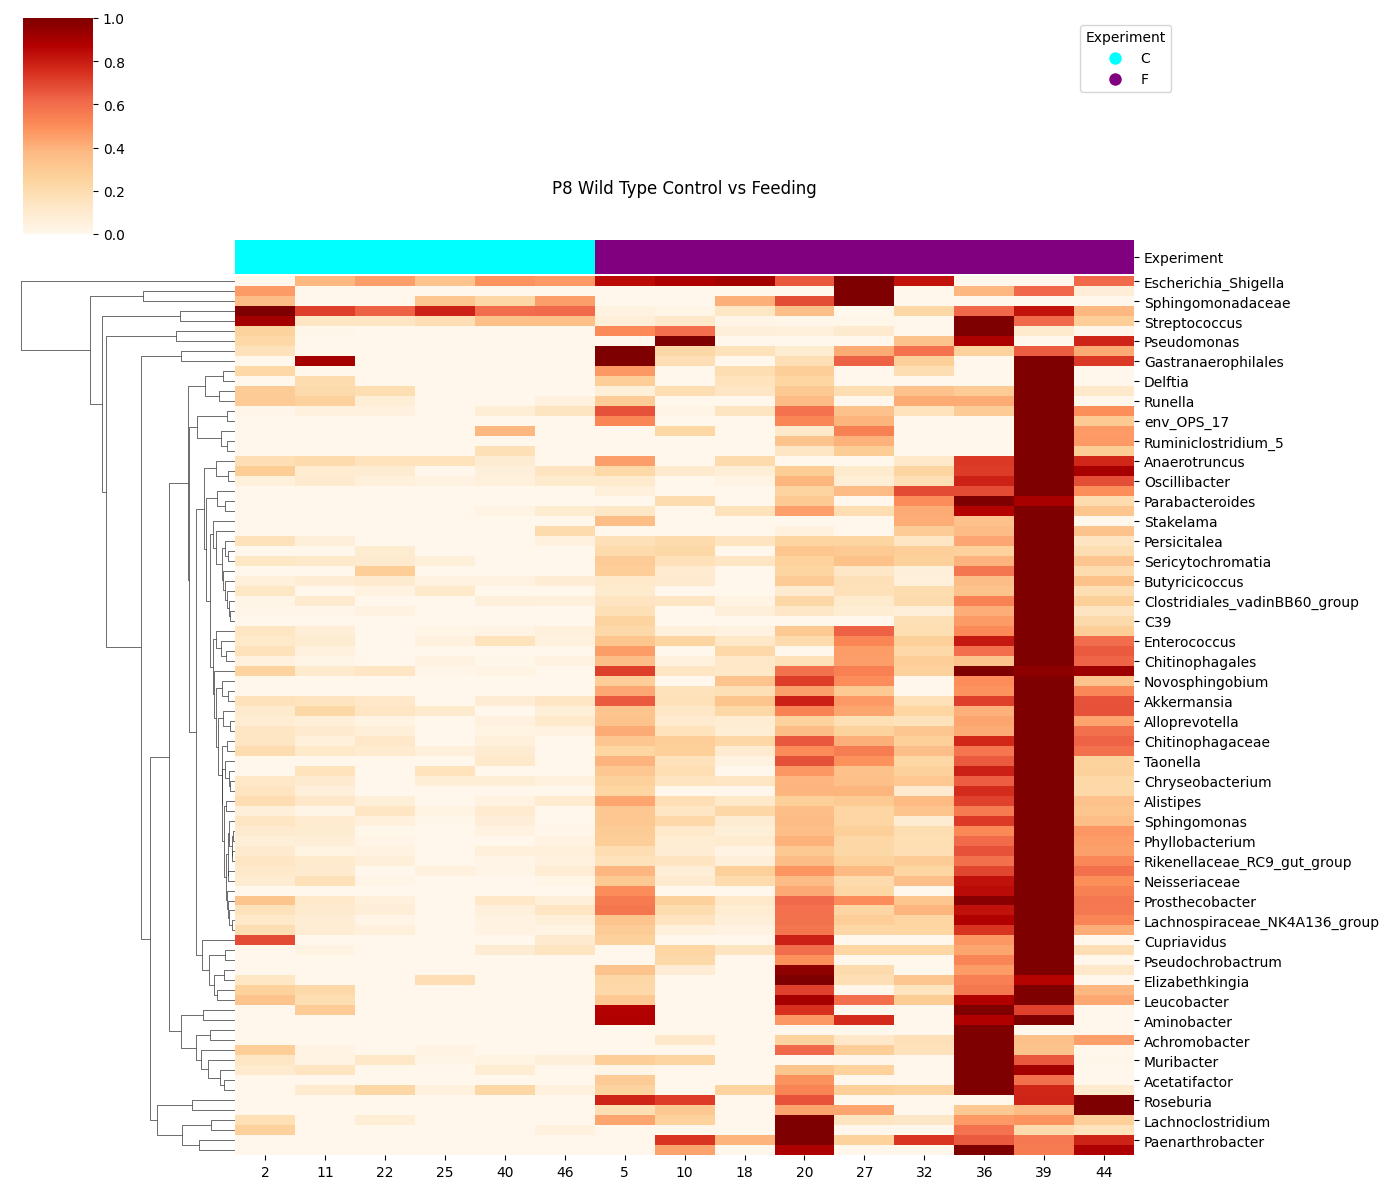

In [9]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    # print(legend_handles)
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram
    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = "P8 Wild Type Control vs Feeding"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)

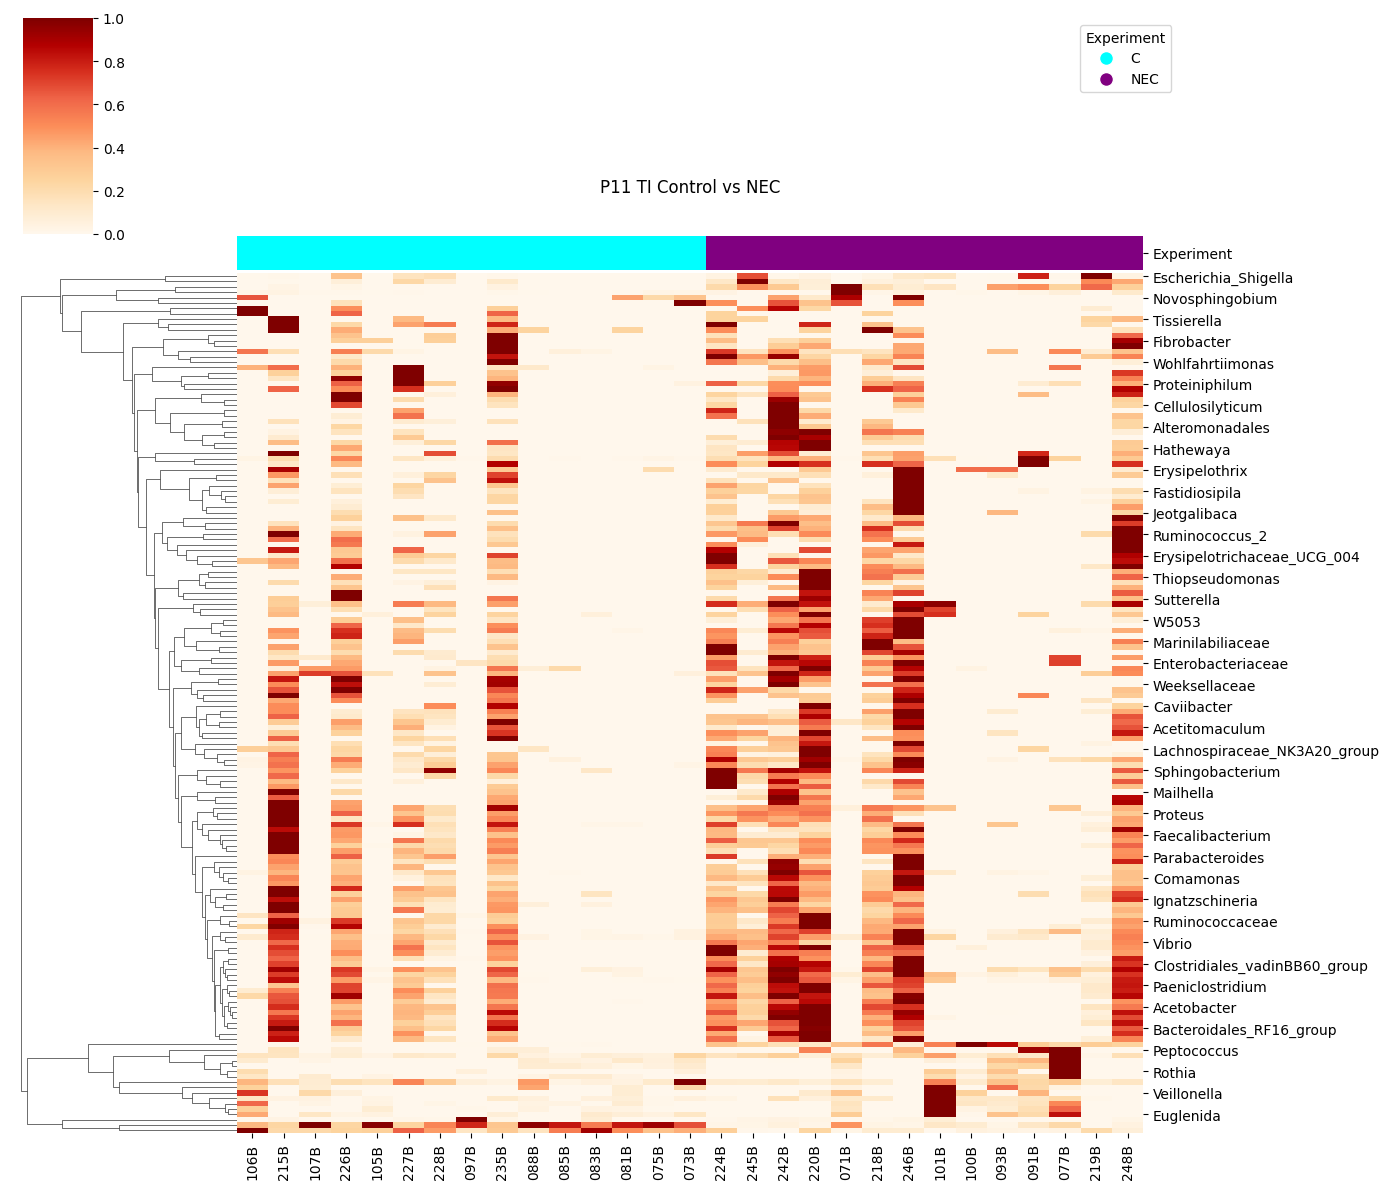

In [38]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = "P11 TI Control vs NEC"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)